2023-05-10 12:55:57,847 INFO Welcome to the CDS
2023-05-10 12:55:57,848 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-10 12:55:58,051 INFO Request is completed
2023-05-10 12:55:58,052 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data5/adaptor.mars.internal-1683743599.7239895-26230-6-b30bf86b-4c96-4611-bc4d-499123ebcd7f.nc to ../pyAPS_data/example/ERA5_2020-01-03T00:00_130.24_31.25_131.26_32.65.nc (8.5K)
2023-05-10 12:55:58,230 INFO Download rate 47.9K/s
2023-05-10 12:55:59,329 INFO Welcome to the CDS
2023-05-10 12:55:59,330 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels
2023-05-10 12:55:59,566 INFO Request is completed
2023-05-10 12:55:59,567 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data2/adaptor.mars.internal-1683743810.6669247-23948-9-88254f8e-3baa-497e-8750-25

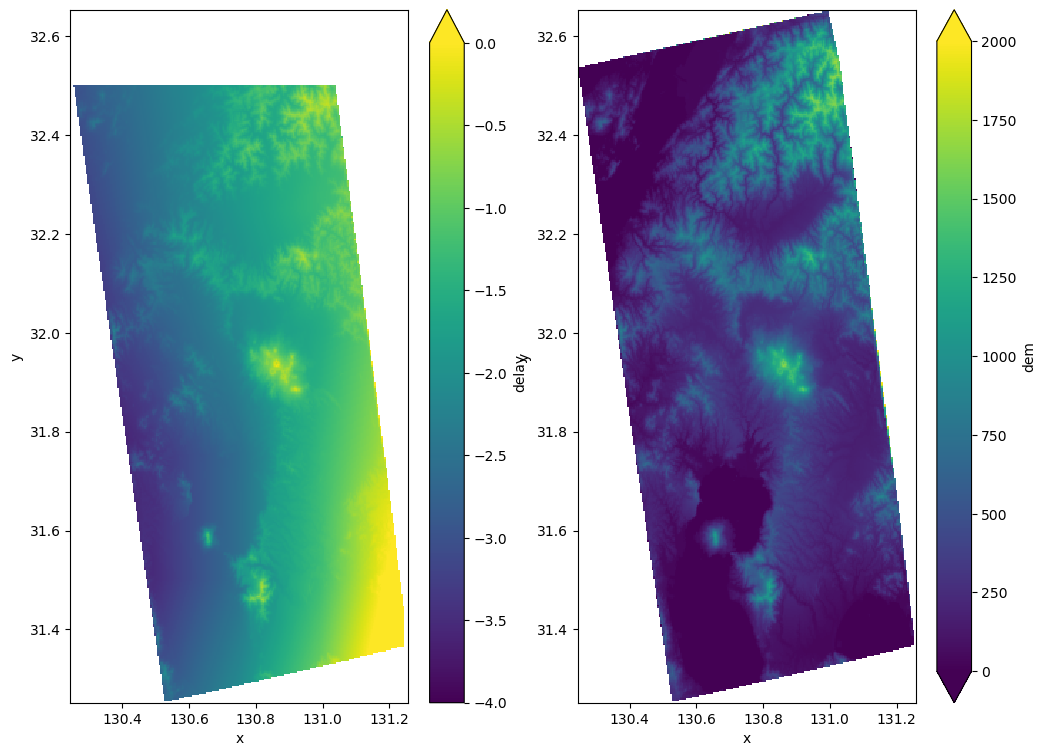

In [2]:
import sys
import xarray as xr
import matplotlib.pyplot as plt

# this relative path assumes you are in the notebooks directory
sys.path.append('..')
from phase_o_matic import presto_phase_delay

# this relative path assumes you are in the notebooks directory
dem_dataset = xr.open_dataset('../pyAPS_data/pyaps_geom.nc')

work_dir = '../pyAPS_data/example'

t1 = presto_phase_delay(date = '2020-01-03', geometry = dem_dataset, work_dir = work_dir, wavelength = 0.238403545)
t2 = presto_phase_delay(date = '2020-01-10', geometry = dem_dataset, work_dir = work_dir, wavelength = 0.238403545)

delay_change = t2.isel(time = 0)['delay'] - t1.isel(time = 0)['delay']

fig, axes = plt.subplots(1, 2, figsize = (12, 9))
delay_change.plot(ax = axes[0], vmax = 0, vmin = -4)
dem_dataset['dem'].plot(ax = axes[1], vmin = 0, vmax = 2000)
plt.savefig('../images/usage.png')